# Sverre, Eivind, José Tomas

# Oppgave 5: Funksjoner av to variable

## Innledning
Oppgaven vår har ingen spesifikk problemstilling, men handler mer om å utforske funksjoner av to variable og hvordan man kan bruke kode til å løse og plotte slike. Dette vil være hensikten med oppgaven.

## Teori
Funksjoner med to variabler får ut en verdi for hver kombinasjon av variablene. Det danner todimensjonale plan. En funksjon av to variable i Python vil se slik ut:

In [3]:
def f(x,y):
    return x*y+x**2

b=0
for a in range(5):
    print(f(a,b))
    b+=1

0
2
8
18
32


## Plotting av funksjoner med to variable
Bruker matplotlib.

Vi bruker f(x,y)=xy+x^2 som eksempel. Først importer vi bibliotekene vi trenger, og definer en figur og et koordinatsystem med tre dimensjoner. Lager to matriser, en for x og en for y, og lager et rutenett ut fra disse matrisene. Definerer den siste verdien som funksjonen av x og y, og bruker funksjonen fra bibliotekene til å printe et plot.


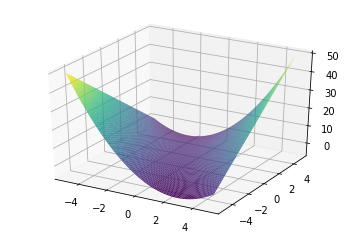

In [5]:
"""Biblioteker"""
import numpy as np
import matplotlib
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

"""Funksjon"""
def f(x,y):
    return x*y+x**2

fig = plt.figure() #Definerer en figur
ax = plt.axes(projection='3d') #Koordinatsystem

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

"Verdier for plot"""
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap = 'viridis', edgecolor='none') #Bruker funksjonen fra biblioteket

## Nullpunkt
Et nullpunkt forekommer når funksjonsuttrykket er lik null. Punktene til en funksjon av to variable vil inneholde tre verdier, (x,y,z), der z-verdien tilsvarer verdien til funksjonen. Et nullpunkt vil derfor være (a,b,0), der a og b gjør funksjonen lik 0. 

Når du skal finne nullpunktet til en funksjon av to variable, så får man et uttrykk. Ta f(x,y)=xy+x^2 som et eksempel. Hvis funksjonen skal være lik 0, får man 0=xy+x^2. Litt flytting og bytting og man får y=-x. Uttrykket beskriver forholdet mellom alle y- og x-verdier som gir f(x,y) lik 0. 


### Hvordan fungerer programmene som finner nullpunktene til en funksjon på formen f(x,y)?
Vi har laget 2 funksjoner der den første tar utgangspunkt i halveringsmetoden og den andre tar utgangspunkt i newtons metode. Den med halveringsmetoden fungerer slik at man først går langs y aksen. For hver verdi av y går vi bort over x aksen. Vi har alltid to punkter med en gitt avstand mellom hverandre. Vi bruker skjæringssetningen, så vi vet at om z verdien i de 2 punktene har ulikt fortegn så vil det være et punkt i mellom som har funksjonsverdi lik 0. Vi løser den ikke helt lik 0 på grunn at det tar unødvendig lang tid. Vi bruker en toleranse istedenfor som er lik 10^-8. Vi legger x- og y-verdiene inn i lister, som vi senere bruker til å plotte på en 2 dimensjonal flate. Vi gjør det også motsatt vei, går langs x aksen og gjør det samme med y verdiene, for å være helt sikker på at vi har fått med oss alle 0 punktene. 

Den andre funksjonen som tar utgangspunkt i halveringsmetoden går også langs y-aksen også prøver den å finne nullpunktene ved å regne ut et punkt med formelen: d = c - f(c)/f’(c). Når vi prøver å finne nullpunkt langs x aksen bruker vi den deriverte med hensyn på x. Denne kan vi numerisk regne ut ved: (f(x+h,y)-f(x,y))/h. Vi sjekker om f(d,y) er mindre enn toleransen, som vi har satt til 10^-8, og vi fortsetter helt til absoluttverdien av f(d,y) er mindre enn toleransen. Vi legger til x og y verdiene til nullpunktene i hver sin liste. Gjør det samme bare at vi går langs x aksen og prøver å finne nullpunkt langs y aksen per x verdi. Vi gjør dette for å være sikker på at vi får med alle nullpunktene.

Vi har laget 2 funksjoner fordi vi ønsket å se hvordan det ville fungere å ta hovedideene for å finne nullpunkt numerisk til en funksjon med en variabel til en med flere variable. Vi ser under at Newtons metode tar relativtivt mye kortere tid å finne nullpunktene ved newtons metode for flere variable enn med halveringsmetoden. Men ved vanskeligere funksjoner enn den vi har brukt som eksempel kan newtonsmetode bli unøyaktig. Noen ganger finner den ikke nullpunktene fordi vi får et punkt som er på andre siden av nullpunktet. Mens med halveringsmetoden er man sikker på at man har fått med seg alle nullpunktene, utenom når funksjonsverdien av to punkter på hver sin side av nullpunktet har samme fortegn. Begge algoritmene har sine fordeler, men jeg vil si at newtons metode fungerer best når vi har lette funksjoner som den vi har brukt som eksempel i denne oppgaven. Det går fortere og er nøyaktig.


Tiden det tar å finne nullpunktene er: 3.6478402614593506 sekunder


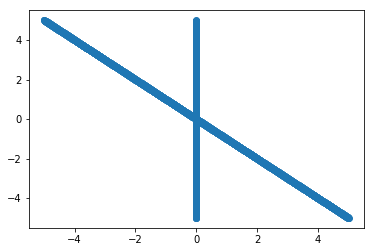

In [2]:
import numpy as np
import pylab as pl
import time

start = time.time()

def f(x,y):
    return x*y + x**2

def roots(a,b,f):  #Funksjon som finner nullpunktene til funksjonen f på formen f(x,y)
    tol = 1E-8 #Toleranse

    #Lister og matriser som vi bruker
    y_vals = np.arange(a,b,0.01) #x verdiene
    x_vals = np.arange(a,b,0.01) #y verdiene
    roots_x = []
    roots_y = []

    for y_idx in range(0,len(y_vals)):
        x = a
        while x < b:    
            xc = x + 0.01
            for i in range(1000):    #Halveringsmetoden algoritmen
                if f(x,y_vals[y_idx])* f(xc,y_vals[y_idx]) < 0: #Sjekker om z verdien i punktene har ulikt foregn
                    if abs(f(x,y_vals[y_idx])) < tol: #Sjekker om absoluttverdien er mindre en toleransen
                        roots_x.append(x)
                        roots_y.append(y_vals[y_idx])
                        break 
                    elif abs(f(xc,y_vals[y_idx])) < tol:
                        roots_x.append(xc)   #Legger til x koordinatet til nullpunktet i en liste
                        roots_y.append(y_vals[y_idx]) #Legger til y koordinatet til nullpunktet i en annen liste
                        break
                    else:
                        d = (x +xc)*0.5
                        if f(x,y_vals[y_idx])* f(d,y_vals[y_idx]):
                            x = d
                        else:
                            xc = d
                else:
                    break
            x = xc #den nye verdien er lik x verdien til det andre punktet. Sånn får vi sjekka alle punkter systematisk

    for x_idx in range(0,len(x_vals)): #Gjør det samme, bare at vi går langs x-aksen og for hver x-verdi prøver vi å
        y = a                       #nullpunkter langs y-aksen
        while y < b:
            yc = y + 0.01
            for i in range(1000):
                if f(x_vals[x_idx],y)* f(x_vals[x_idx],yc) <= 0:
                    if abs(f(x_vals[x_idx], y)) < tol:
                        roots_x.append(x_vals[x_idx])
                        roots_y.append(y)
                        break 
                    elif abs(f(x_vals[x_idx],yc)) < tol:
                        roots_x.append(x_vals[x_idx])
                        roots_y.append(yc)
                        break
                    else:
                        yd = (y +yc)*0.5
                        if f(x_vals[x_idx],y)* f(x_vals[x_idx],yd):
                            y = yd
                        else:
                            yc = yd
                else:
                    break
            y = yc

    return roots_x, roots_y #returnerer listene med x- og y-koordinatene til nullpunktene

roots_x, roots_y = roots(-5,5,f) #Kaller funksjoen

end = time.time()
print("Tiden det tar å finne nullpunktene er:",end-start, "sekunder")    #Sier hvor lang tid funksjonen tar

pl.plot(roots_x,roots_y,'o')     #plotter nullpunktene i xy-planet
pl.show()

Tiden det tar å finne nullpunktene er: 0.7568356990814209  sekunder


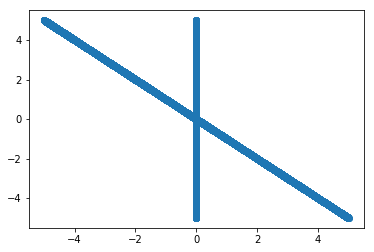

In [13]:
start = time.time()

def f(x,y): #Funksjonen f
    return x*y + x**2


def nullpunkt(a,b,f):    #Funksjonen som finner nullpunkt med en modifisert versjon av newtons metode
    tol = 1E-8
    
    #Matriser med x og y verdiene
    x_vals = np.arange(a,b,0.01)
    y_vals = np.arange(a,b,0.01)
    
    #Lister der vi skal legge inn x og y koordinatene til nullpunktene
    rootsx = []
    rootsy = []

    def derx(x,y):     #Funksjon som regner ut den deriverte med hensyn på x i punktet
        h = 1E-8
        return (f(x+h,y)-f(x,y))/h

    def dery(x,y):     #Funksjon som regner ut den deriverte med hensyn på y i punktet
        h = 1E-8
        return (f(x,y+h)-f(x,y))/h

    for y_idx in range(0,len(y_vals)):   #Går langs y-aksen
        x = a
        while x < b:   #For hver y verdi prøver vi å finne nullpunkter langs x-aksen med newtonsmetode
            c = x
            for i in range(50):
                if abs(f(c,y_vals[y_idx])) < tol:
                    rootsx.append(c)
                    rootsy.append(y_vals[y_idx])
                    break
                else:
                    if derx(c,y_vals[y_idx]) == 0:
                        break
                    else:
                        d = c - f(c,y_vals[y_idx]) / derx(c,y_vals[y_idx])
                        c = d
            x += 1    #Vi bruker algoritmen for en x verdi som er 1 mer enn den forrige.

            
    #Gjør det samme, bare motsatt.
    for x_idx in range(0,len(x_vals)):
        y = a
        while y < b:
            c = y
            for n in range(50):
                if abs(f(x_vals[x_idx],c)) < tol:
                    rootsx.append(x_vals[x_idx])
                    rootsy.append(c)
                else:
                    if dery(x_vals[x_idx],c) == 0:
                        break
                    else:
                        d = c - f(x_vals[x_idx],c) / dery(x_vals[x_idx],c)    #Finner punktet 
                        c = d
            y += 1      #Vi bruker algoritmen for en y verdi som er 1 mer enn den forrige.
    return rootsx, rootsy    #Funksjonen returnerer listen med x- og listen med y-koordinatet til nullpunktene

rootsx, rootsy = nullpunkt(-5,5,f)  #Kaller funksjonen

end = time.time()
print("Tiden det tar å finne nullpunktene er:",end-start, "sekunder")    #Sier hvor lang tid funksjonen tar

pl.plot(rootsx,rootsy,'o')    #plotter punktene i xy-planet
pl.show()

## Derivering av funksjoner av to variable

Når man deriverer en funksjon med to variable får man to separate deriverte. De kalles partiellderiverte. Den partiellderiverte for x df/dx beskriver veksten i x retning og den partiellderiverte for y df/dy beskriver veksten i y retning. Disse verdiene slå sammen til en vekltor ∇f =  [df/dx, df/dy]  som kalles gradienten. Når man finner den partiellderiverte for x ser man på y som en konstant og motsatt.

### Hvordan fungerer programmet?

Programmet regner ut gradienten i et punkt. Den lager en vektor der den første verdien er funksjonen derivert med hensyn på x, i det punktet. Den andre verdien er funksjonen derivert med y i det punktet.

In [3]:
def f(x,y):    #Definerer funksjon
    return x*y + x**2

def grad(f,x, y): #funksjonen som finner gradienten i punktet (x,y,f(x,y))
    h = 10E-8
    
    def derx(f,x,y): #funksjon som finner den deriverte med hensyn på x i punktet
        return (f(x+h,y)-f(x,y))/h
    def dery(f,x,y): #funksjon som finner den deriverte med henysn på y i punktet
        return (f(x,y+h)-f(x,y))/h
    
    return [derx(f,x,y),dery(f,x,y)]  #definerer gradienten som en vektor, bruker funksjonenene for den partiellderiverte

print(grad(f,1,-1)) #Printer og kaller funksjonen

[1.0000001005039394, 0.9999999994736442]


## Differensiallikninger

Differensiallikninger for funksjoner av to variabler må inneholde den partiellderiverte for x og y. De kan både skrive som en likning eller likningssett der det er en likning med den partiellderiverte for x og en for y.

### Hvordan fungerer programmet som løser differensiallikninger numerisk?

Programmet regner med differensiallikninger som er delt i likningssett. Programmet bruker eulers metode som baserer seg på at man har et startpunkt og regner neste verdien ut fra punktet og uttrykket for den deriverte. Siden det er to uttrykk for den deriverte må man regner ut verdier i to retninger. Programmet vårt gjør det ved å beregne en verdi i x retning, deretter beregner den verdier i y retning fram til den satte ende verdien. Det repeteres til hele rutenettet er fylt med verdier.

Programmet har noen ulemper. Den første er at programmet må regne veldig mange verdier, siden det er et rutenett kreves kvadratet av antall verdier for samme oppløsning for en todimensjonal difflikning.

Den andre ulempen er at når den beregner verdier i x retning tar den ikke hensyn til om den partielle deriverte av x inneholder y fordi den bare regner de verdiene langs y=0 og så regner stigningen i y retning. Det gjør at det er veldig mange differensiallikninger som ikke fungerer.

Programmet har også et problem med at den siste verdien i x retning altid er null.


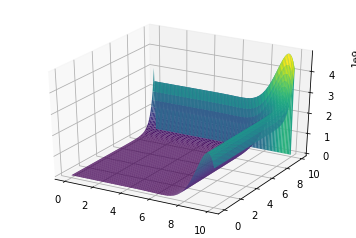

In [6]:
import pylab as pl
import matplotlib
from mpl_toolkits import mplot3d

import numpy as np
import matplotlib.pyplot as plt


h=10**-1                    #steglengde
N=int(10/h)                 #start
y=pl.zeros(N)               #matriser fylt med null for hvert steg
x=pl.zeros(N)
z = np.empty([N,N])         #todimensjonal matrise
def partiellx(x,y,z):       
    return 10**x

def partielly(x,y,z):
    return pl.sin(y)*y**10
i=0
for u in range(N-1):
   z[u+1,0]=z[u,0]+partiellx(x[u],y[0],z[u,0])*h       #Beregner neste x verdi
   x[u+1]=x[u]+h
   for i in range(N-1):
        z[u,i+1]=z[u,i]+partielly(x[u],y[i],z[u,i])*h   #Beregner alle y verdiene for x verdien
        y[i+1]=y[i]+h

Y=np.linspace(0,10,N)
x=np.linspace(0,10,N)
X,Y=np.meshgrid(x,y)
#print(z)

fig = plt.figure()
ax = plt.axes(projection='3d')

Z=z
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap = 'viridis', edgecolor='none')

## Topp-, bunn- og sadelpunkt

Også kjent som kritiske punkter. Fra funksjoner av en variable har man at man kan finne ekstremalpunkter ved å finne hvor den deriverte av funksjonen er lik null. Her bruker man partiellderivasjon.

Sadelpunkter er et punkt hvor den partiellderiverte av både x og y er lik null, med z-verdien er verken den største eller minste verdien til funksjonen. Man kan klassifisere de kritiske punktene ved å se på fortegnet til de partiellderiverte av annen orden. Hvis både den partiellderiverte av annen orden med hensyn på x og den med y er negative er det et punkt, og hvis begge er positive er det et bunnpunkt. Mens i et sadelpunkt har de partiellderiverte av annen i det punktet ulikt fortegn. Så det kan for eksempel være et toppunkt i x-retning, mens et bunnpunkt i y-retning. For funksjoner av en variable kalles dette et terrassepunkt. 



### Hvordan fungerer programmet som finner de kritiske punktene?

Programmet fungerer ved at man bruker halvering metoden for å finne når den deriverte til funksjonen er lik 0. Skjæringssetningen sier oss at hvis man har to punkter i en kontinuerlig funksjon der punktene har ulikt fortegn, så ville det være et punkt mellom de som har en funksjonsverdi lik 0. Siden den deriverte av en funksjon også kan skrives som en funksjon kan vi bruke dette til å finne nullpunktene til den deriverte.

Funksjonen vår finner de kritiske punktene ved at den går først langs y aksen. For verdi av y går vi langs alle verdier av x i intervallet vi har definert. Vi starter med et punkt i den ene enden av definisjonsmengden, også tar vi et punkt som er litt lenger bortenfor. Deretter prøver vi å finne om det er et punkt mellom der den partiell deriverte med hensyn på x er lik 0. Om den er lik 0 sjekker vi om den partiell deriverte med hensyn på y også er lik 0. Hvis begge er lik 0, legger vi til x verdien i en liste der vi har x-koordinatene til en de kritiske punktene og y verdien i en liste der vi har y-koordinatene. Vi gjør det samme bare motsatt vei. Dette gjør at vi får med oss alle de kritiske punktene. Hvis de kritiske punktene slik som toppunktene og bunnpunktene ligger ved siden av hverandre slik at vi ikke får registrert at den deriverte til de punktene har ulikt fortegn. Men hvis vi gjør det motsatt vei vil vi få med alle.

Til slutt bruker vi x -og y-koordinatene til de kritiske punktene plotter og plotter de i 2D. 

Det tar litt å kjøre, spesielt når området man undersøker er stort. Dette er nok ikke den raskeste eller den beste måten å finne de kritiske punktene på. Den klassifiserer heller ikke de kritiske punktene, og det er noe man kunne ha gjort ganske greit.

6.627998113632202


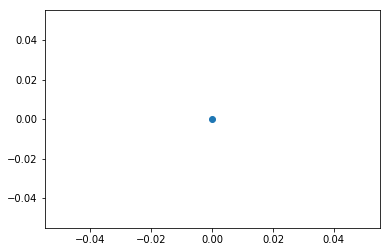

In [8]:
def f(x,y):
    return x**2 + x*y

def ekstremalpunkt(a,b,f): #Definerer funksjonen
    tol = 1E-4#Toleranse

    #Matriser, med x verdier og y verdier. Danner et rutenett
    y_vals = np.arange(a,b,0.01)
    x_vals = np.arange(a,b,0.01)
    
    #Lister der vi legger til x og y verdien til ekstremalpunktene
    eks_x = []
    eks_y = []

    #Funksjon som deriverer med hensyn på x
    def derx(x,y):
        h = 1E-8
        return (f(x+h,y)-f(x,y))/h

    #Funksjon som deriverer med hensyn på y
    def dery(x,y):
        h = 1E-8
        return (f(x,y+h)-f(x,y))/h

    #En for løkke der man går gjennom alle y verdiene, og for hver y verdi går bort over x aksen og prøver å finne punkter der den
    #den deriverte er lik 0
    for y_idx in range(0,len(y_vals)):
        x = a
        while x < b: #Definerer 2 punkter som vi skal bruke i halveringsmetoden
            xc = x + 0.01 #avstanden mellom punktene
            for i in range(1000): #Halveringsmetoden for den deriverte av x
                if derx(x,y_vals[y_idx]) * derx(xc,y_vals[y_idx]) < 0: #Undersøker om det de 2 punktene har ulikt fortegn
                    if abs(derx(x,y_vals[y_idx])) < tol:        #sjekker om den deriverte er lik 0
                        if abs(dery(x,y_vals[y_idx])) < tol:
                            eks_x.append(round(x,8))
                            eks_y.append(round(y_vals[y_idx],8))         #Hvis den deriverte er lik 0 legger vi den til i lister
                            break 
                        else:
                            break
                    elif abs(derx(xc,y_vals[y_idx])) < tol:
                        if abs(dery(xc,y_vals[y_idx])) < tol:
                            eks_x.append(round(xc,8))
                            eks_y.append(round(y_vals[y_idx],8))
                            break
                        else:
                           break
                    else:
                        d = (x + xc)*0.5        #Definerer nytt punkt mellom de to punktene
                        if derx(x,y_vals[y_idx])* derx(d,y_vals[y_idx]):    
                            x = d      
                        else:
                            xc = d
                else:
                    break
            x = xc      #x blir definert som det andre punktet, sånn er vi sikker på at vi får med alle punktene 
    
    #Gjør det samme på nytt, bare at vi først går langs x verdiene og prøver å finne punkter der den deriverte er lik null
    #for y verdier for hver x verdi
    for x_idx in range(0,len(x_vals)):
        y = a
        while y < b:
            yc = y + 0.01
            for i in range(1000):
                if dery(x_vals[x_idx],y)* dery(x_vals[x_idx],yc) <= 0:
                    if abs(dery(x_vals[x_idx], y)) < tol:
                        if abs(derx(x_vals[x_idx],y)) < tol:
                            eks_x.append(round(x_vals[x_idx],8))
                            eks_y.append(round(y,8))
                            break 
                        else:
                            break
                    elif abs(dery(x_vals[x_idx],yc)) < tol:
                        if abs(derx(x_vals[x_idx],yc)):
                            eks_x.append(round(x_vals[x_idx],8))
                            eks_y.append(round(yc,8))
                            break
                    else:
                        yd = (y +yc)*0.5
                        if dery(x_vals[x_idx],y) * dery(x_vals[x_idx],yd) < 0:
                            y = yd
                        else:
                            yc = yd
                else:
                    break
            y = yc
            
    return eks_x, eks_y , derx, dery    #Returnerer listene med ekstremalpunktene og funksjonene for den deriverte med hensyn på x og y

start = time.time()

eks_x, eks_y, derx,dery = ekstremalpunkt(-5,5,f)  #kaller funksjonen

end = time.time()
print(end-start)

if not(len(eks_x) == 0 and len(eks_y) == 0):    #Plotter de kritiskei xy planet, hvis det er noen
    pl.plot(eks_x,eks_y,'o')
    pl.show()

## Konklusjon

Vi kan konkludere med at gjennom disse 6 programmene har vi utforsket funksjoner av to variable, og lagd programmer som kan utføre operasjoner som nevnt ovenfor.